# 2.3 지도 학습 알고리즘
## 2.3.1  예제에 사용할 데이터셋

X.shape: (26, 2)


C:\anaconda\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


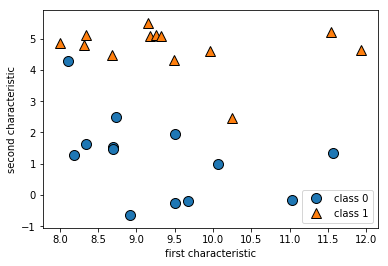

In [3]:
import mglearn
import matplotlib.pyplot as plt

X, y = mglearn.datasets.make_forge()

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(['class 0', 'class 1'], loc =4)
plt.xlabel('first characteristic')
plt.ylabel('second characteristic')
print('X.shape: {}'.format(X.shape))

# scatter plot of forge dataset

X.shape 값에서 알 수 있듯이 데이터 포인트 26개와 특성 2개를 가진다.

회귀 알고리즘 설명에는 인위적으로 만든 wave 데이터셋 사용
 - 입력 특성 하나와 모델링할 타깃 변수(또는 응답)을 가짐

Text(0,0.5,'target')

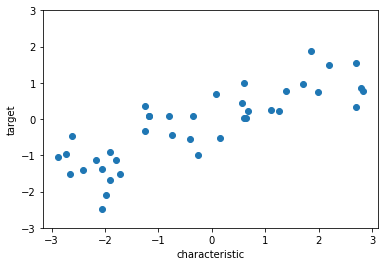

In [5]:
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X,y,'o')
plt.ylim(-3,3)
plt.xlabel('characteristic')
plt.ylabel('target')

인위적인 소규모 데이터셋 외에 scikit-learn에 들어 있는 실제 데이터셋 두 개
 - 1) 유방암 종양의 임상 데이터를 기록해놓은 위스콘신 유방암 데이터셋 (cancer)
    - 각 종양은 양성(benign)과 악성(malignant)으로 레이블되어 있고, 조직 데이터를 기반으로 종양이 악성인지를 예측할 수 있도록 학습하는 것이 과제
 - 2) 회귀 분석용으로써 보스턴 주택 가격 데이터셋
    - 범죄율, 찰스강 인접도, 고속도로 접근성 등의 정보를 이용해 1970년대 보스턴 주변의 주택 평균 가격을 예측하는 것

In [7]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print('cancer.keys(): \n {}'.format(cancer.keys()))

cancer.keys(): 
 dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


In [9]:
print('유방암 데이터의 형태 : {}'.format(cancer.data.shape))

# 569개의 데이터 포인트를 가지고 있고 특성은 30개임

유방암 데이터의 형태 : (569, 30)


In [10]:
import numpy as np
print('클래스별 샘플 개수:\n{}'.format({n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}))

클래스별 샘플 개수:
{'malignant': 212, 'benign': 357}


In [11]:
print("특성 이름 : \n{}".format(cancer.feature_names))

특성 이름 : 
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [13]:
from sklearn.datasets import load_boston
boston = load_boston()
print("shpae of data : {}".format(boston.data.shape))

shpae of data : (506, 13)


13개의 입력 특성뿐 아니라 특성끼리 곱하여 (또는 상호작용이라 부름) 의도적으로 확장

이를 특성공학(feature engineering)이라고 한다


In [15]:
X, y = mglearn.datasets.load_extended_boston()
print("X.shpae :{}".format(X.shape))

#중복을 포함한 조합 (13+12+11 ... +1 = 91)

X.shpae :(506, 104)


## 2.3.2  k-최근접 이웃
 가장 가까운 훈련 데이터 포인트 하나를 최근접 이웃으로 찾아 예측에 사용함.

C:\anaconda\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


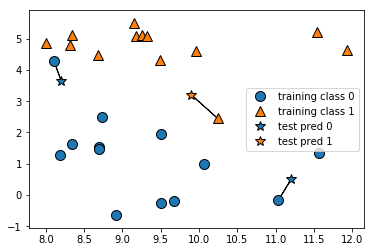

In [17]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

# forge 데이터셋에 대한 1-최근접 이웃 모델의 예측

임의의 k개를 선택할 수도 있다. 
- 둘 이상의 이웃을 선택할 때는 레이블을 정하기 위해 투표를 함
- 즉, 테스트 포인트 하나에 대해 클래스 0에 속한 이웃이 몇 개인지, 그리고 클래스 1에 속한 이웃이 몇 개인지를 세고 이웃이 더 많은 클래스를 레이블로 지정

C:\anaconda\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


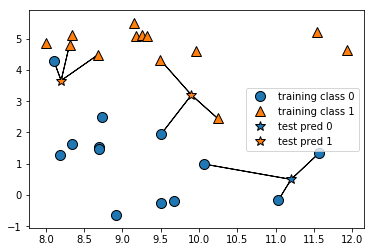

In [20]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

# 예측은 연결된 데이터 포인트의 색으로 나타남

위 그림은 이진 분류 문제지만 클래스가 다수인 데이터셋에도 같은 방법을 적용할 수 다. 클래스가 여러 개일 때도 각 클래스에 속한 이웃이 몇 개인지를 헤아려 가장 많은 클래스를 예측값으로 사용

In [24]:
# scikit-learn을 사용해서 k-최근접 이웃 알고리즘을 어떻게 적용하는지

from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
# 일반화 성능을 평가할 수 있도록 데이터를 훈련 세트와 테스트 세트로 나눔

from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors = 3)
# KNeighborsClassifier을 import하고 객체를 만듦

clf.fit(X_train, y_train)
#훈련 세트를 사용하여 분류 모델을 학습시킴, KNeighborsClassifier에서의 학습은 예측할 때 이웃을 찾을 수 있도록 데이터를 저장하는 것

print('testset prediction : {}'.format(clf.predict(X_test)))

testset prediction : [1 0 1 0 1 0 0]


C:\anaconda\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


In [25]:
# 모델이 얼마나 잘 일반화되었는지 평가하기 위해 score메서드에 테스트 데이터와 테스트 레이블을 넣어 호출

print('testset accuracy: {:.2f}'.format(clf.score(X_test, y_test)))


testset accuracy: 0.86
